# Feature Tracking

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
%matplotlib inline

def plot_image(title, image, cmap=None):
    plt.figure(figsize=(20,20))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.show()

# Feature Tracking Between 2 Images
In this first example, we'll start by tracking visual features.

In [3]:
# Load Different Image Pairs
img1 = cv2.imread("data/images/image0.jpg")
img2 = cv2.imread("data/images/image1.jpg")

# Initialize the FAST detector and BRIEF descriptor
fast = cv2.xfeatures2d.StarDetector_create()
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

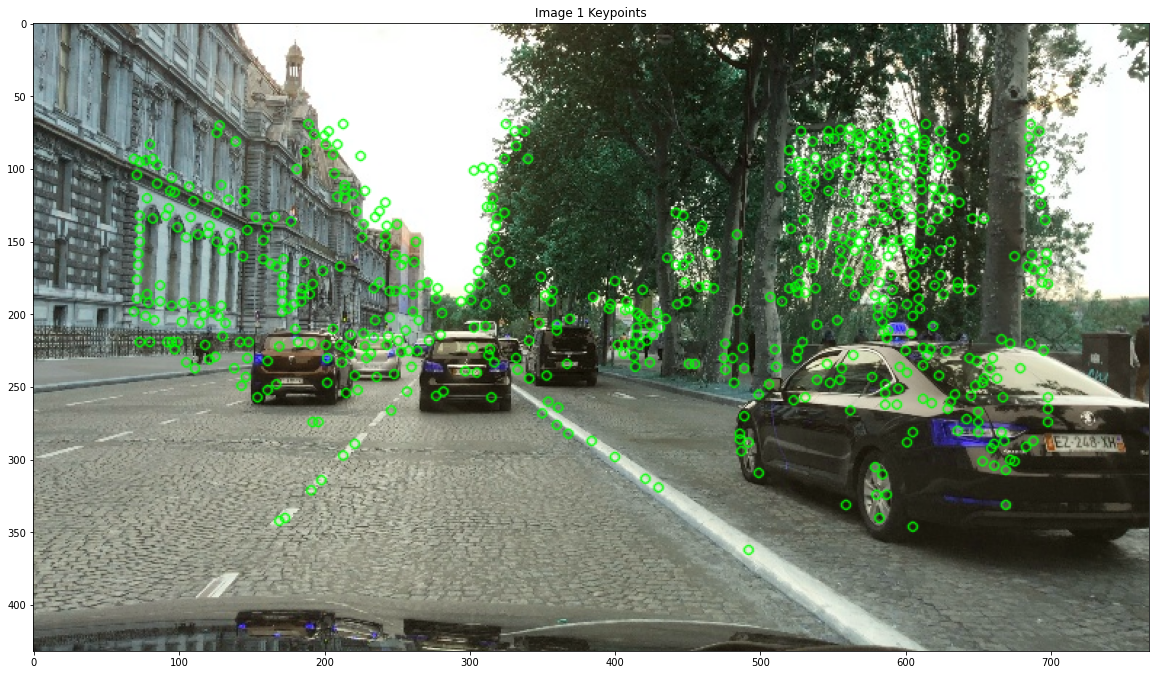

In [4]:
# Detector
kp = fast.detect(img1,None)

# Descriptor
kp1, des1 = brief.compute(img1, kp)

# Draw the keypoints on the image
img1_kp = cv2.drawKeypoints(img1, kp1, None, color=(0,255,0), flags=0)
plot_image("Image 1 Keypoints", img1_kp)

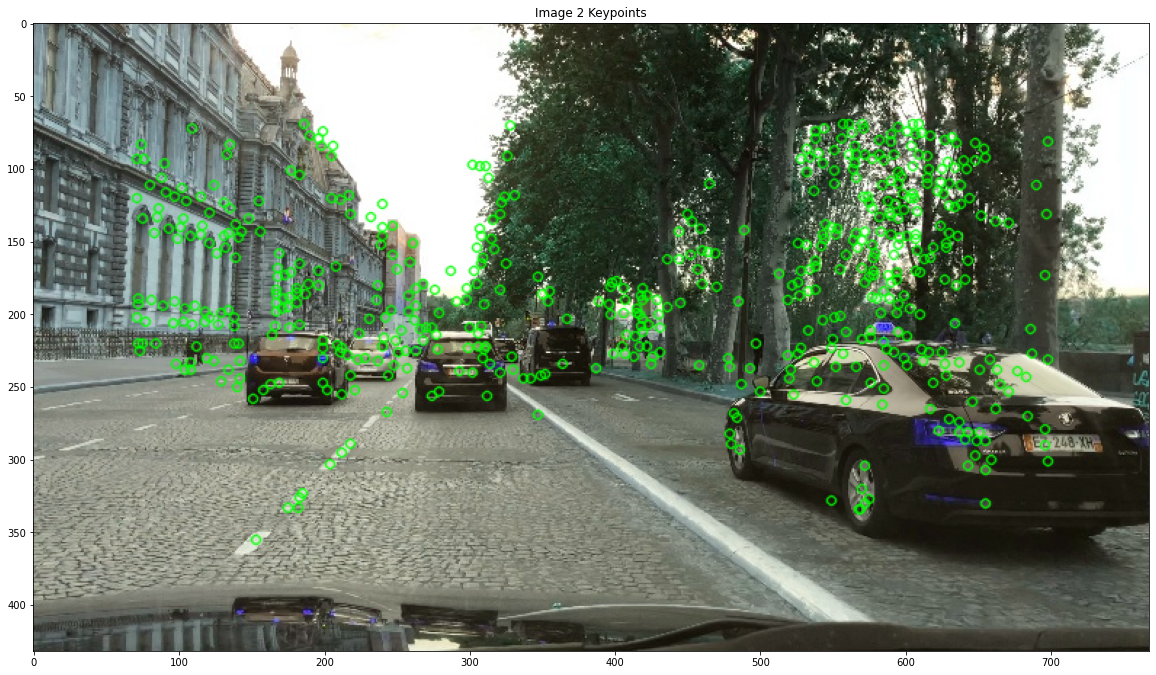

In [5]:
# Detector
kp = fast.detect(img2,None)

# Descriptor
kp2, des2 = brief.compute(img2, kp)

# Draw the keypoints on the image
img2_kp = cv2.drawKeypoints(img2, kp2, None, color=(0,255,0), flags=0)
plot_image("Image 2 Keypoints", img2_kp)

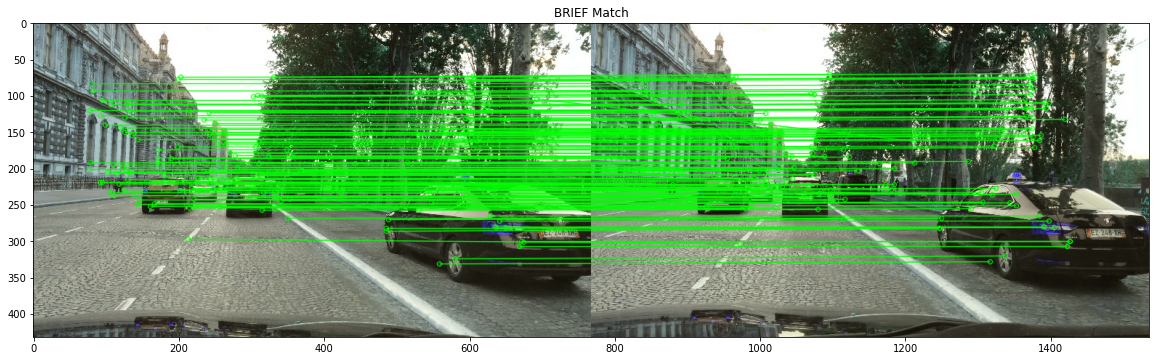

In [6]:
# FLANN matching
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(np.float32(des1),np.float32(des2),k=2) # Use NP.FLOAT32 for ORB, BRIEF, etc

# store all the good matches as per Lowe's ratio test.
good_matches = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good_matches.append(m)

if len(good_matches)>10:
    p1 = np.float32([ kp1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
    p2 = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    flags = 2)

img_briefmatch = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, **draw_params)
plot_image("BRIEF Match", img_briefmatch)